<a href="https://colab.research.google.com/github/chakravartulavinay/SMS_SPAM_DETECTION/blob/main/SMS_SPAM_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# libraries Used

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# data cleaning

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Projects/SMS_Spam_Detection/spam.csv", encoding='ISO-8859-1')

In [ ]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3245,ham,"Funny fact Nobody teaches volcanoes 2 erupt, t...",NaN,NaN,NaN
944,ham,I sent my scores to sophas and i had to do sec...,NaN,NaN,NaN
1044,spam,We know someone who you know that fancies you....,NaN,NaN,NaN
2484,ham,Only if you promise your getting out as SOON a...,NaN,NaN,NaN
812,spam,Congratulations ur awarded either å£500 of CD ...,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
data = data.drop(columns = ["Unnamed: 2", "Unnamed: 3","Unnamed: 4"])

In [ ]:
data.sample(5)

,v1,v2
1086,ham,I don't think he has spatula hands!
483,ham,Thank you baby! I cant wait to taste the real ...
855,spam,Talk sexy!! Make new friends or fall in love i...
4652,ham,Lol yes. But it will add some spice to your day.
1859,ham,What's up. Do you want me to come online?


In [ ]:
# renaming the cols
data = data.rename(columns={"v1":"Target", "v2":"text"}) ## instead of creating a variable u can write inplace = true after text seperaated with a comma.
data

,Target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
#  data["Target"] = data.Target.replace(("ham","spam"),(0,1)) or
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
data["Target"]=encoder.fit_transform(data["Target"])

In [ ]:
data.isnull().sum() ## no missing values

Target    0
text      0
dtype: int64

In [ ]:
# check for duplicate values
# data.duplicated().value_counts() or
data.duplicated().sum()

403

In [ ]:
data = data.drop_duplicates()
data

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(5169, 2)

In [ ]:
data.shape

(5572, 5)

# EDA

In [ ]:
data.head()

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data["Target"].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

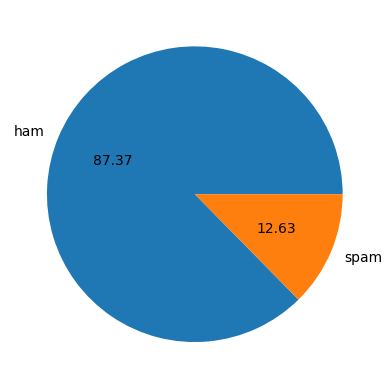

In [ ]:
plt.pie(data["Target"].value_counts(), labels = ["ham", "spam"], autopct = "%0.2f")
plt.show()

In [ ]:
## data is imbalanced
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data["num_characters"] = data["text"].apply(len)

<ipython-input-1125-56f0ba2398b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["num_characters"] = data["text"].apply(len)


In [ ]:
 data.head()

,Target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#number of words
data["num_words"] = data["text"].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-1127-298441d54e0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["num_words"] = data["text"].apply(lambda x:len(nltk.word_tokenize(x)))


In [ ]:
data.head()

,Target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
data["num_sentences"] = data["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-1129-a6cd863275e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["num_sentences"] = data["text"].apply(lambda x:len(nltk.sent_tokenize(x)))


In [ ]:
data.head()

,Target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
data[["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
data[data["Target"]==0][["num_characters", "num_words", "num_sentences"]].describe() # for ham

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
data[data["Target"]==1][["num_characters", "num_words", "num_sentences"]].describe() # for spam

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

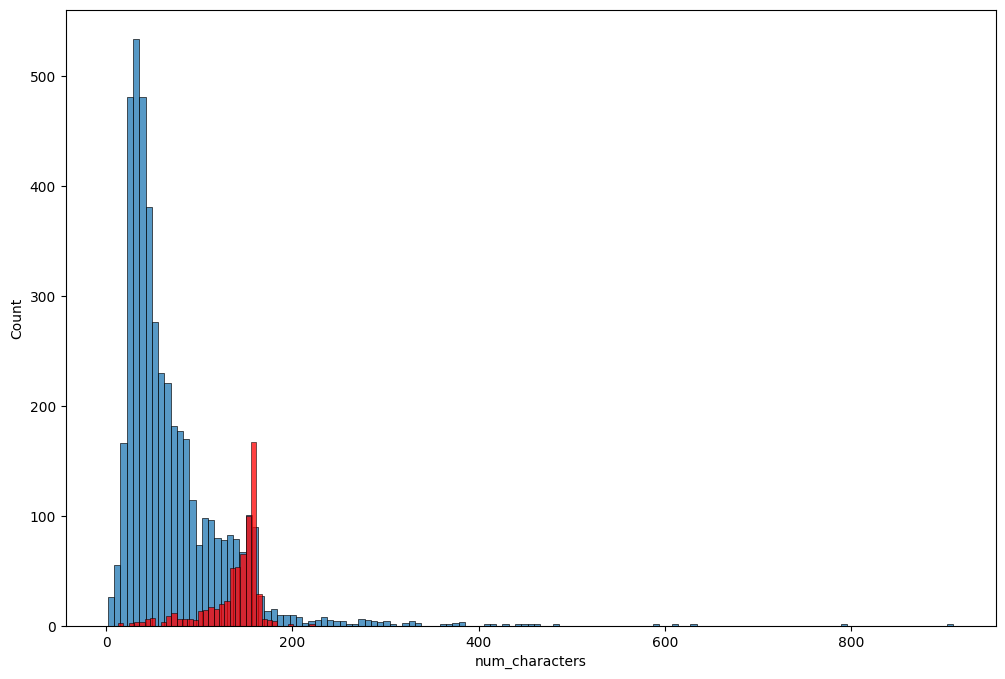

In [ ]:
plt.figure(figsize = (12,8))
sns.histplot(data[data["Target"]==0]["num_characters"])
sns.histplot(data[data["Target"]==1]["num_characters"], color = "red")

<Axes: xlabel='num_words', ylabel='Count'>

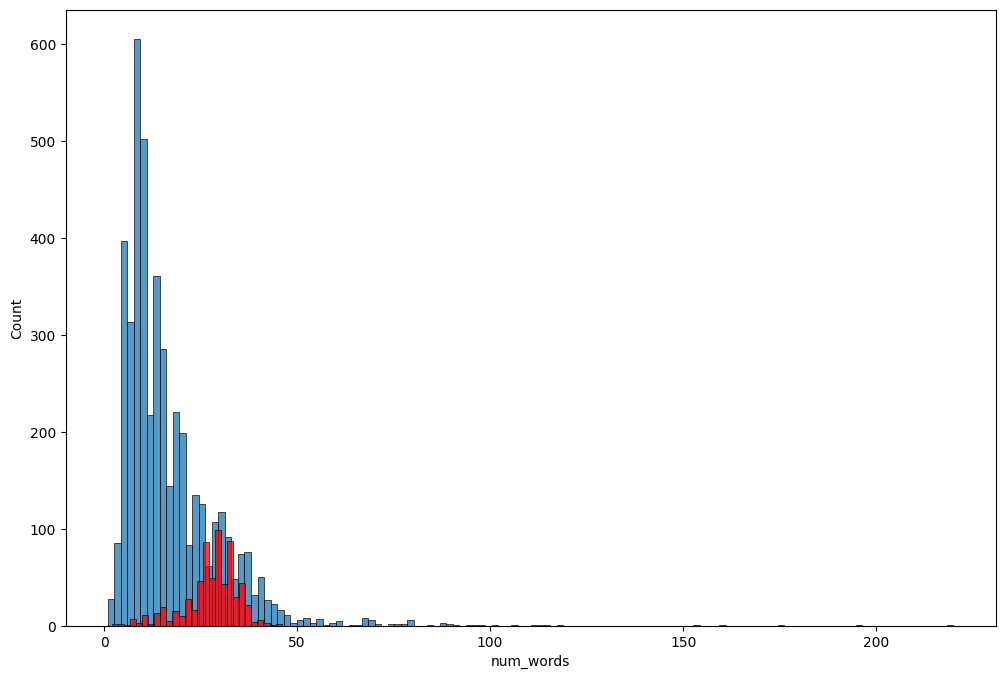

In [ ]:
plt.figure(figsize = (12,8))
sns.histplot(data[data["Target"]==0]["num_words"])
sns.histplot(data[data["Target"]==1]["num_words"], color = "red")

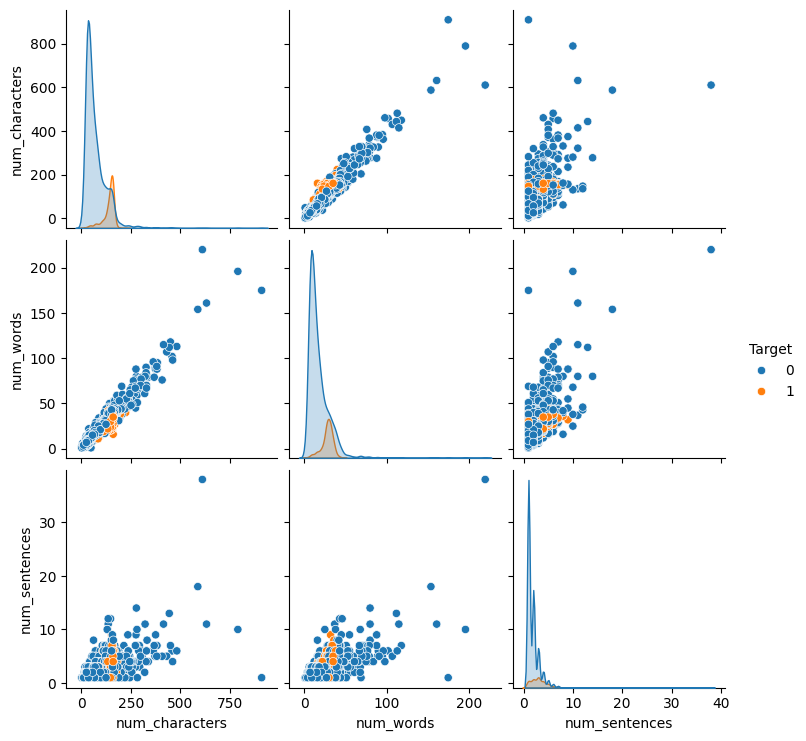

In [ ]:
sns.pairplot(data, hue = "Target") # wre have outliers in our data

# Data Preprocessing


*   lower case
*   tokenization
*   removing special characters
*   removing stop words and puntuation
*   stemming







In [ ]:
# Get the English stopwords
nltk.download('stopwords')
stopwords_list = stopwords.words('english')
# You can print the stopwords if you want to see them
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
ps = PorterStemmer()
ps.stem("loving")

'love'

In [ ]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words("english") and i not in  string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()


  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
transform_text("I loved YT lectures on Machine Learing. How about you??")

'love yt lectur machin lear'

In [ ]:
data["transformed_text"] = data["text"].apply(transform_text)

<ipython-input-1142-f76034ac9568>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["transformed_text"] = data["text"].apply(transform_text)


In [ ]:
data.head()

,Target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = "white")
spam_wc = wc.generate(data[data["Target"] == 1]["transformed_text"].str.cat(sep = " "))

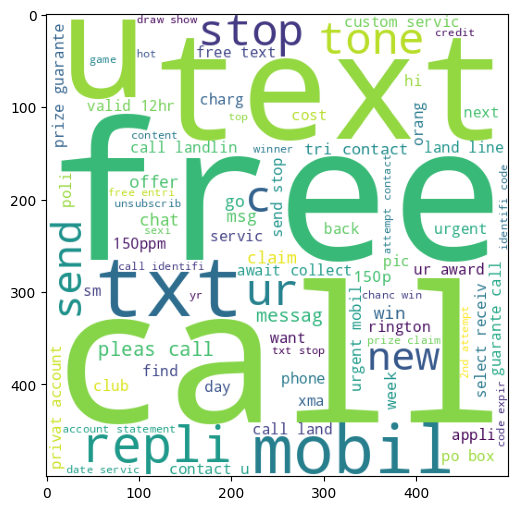

In [ ]:
plt.figure(figsize = (12,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(data[data["Target"] == 0]["transformed_text"].str.cat(sep = " "))

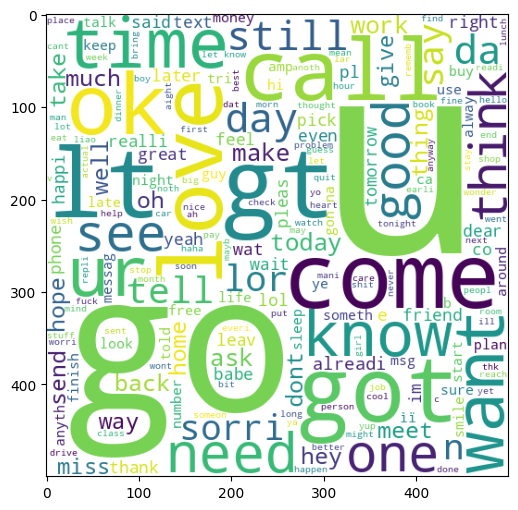

In [ ]:
plt.figure(figsize = (12,6))
plt.imshow(ham_wc)

In [ ]:
data.head()

,Target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus = []
for msg in data[data["Target"] == 1]["transformed_text"].tolist():
  for word in msg.split():
     spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

In [ ]:
Counter(spam_corpus).most_common(30) # gives a dictionary provididng how many times each woprd is repeaated.
pd.DataFrame(Counter(spam_corpus).most_common(30)) # making a dataframe of  the dictionary


,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [ ]:
ham_corpus = []
for msg in data[data["Target"] == 0]["transformed_text"].tolist():
  for word in msg.split():
     ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

In [ ]:
Counter(ham_corpus).most_common(30) # gives a dictionary provididng how many times each woprd is repeaated.
pd.DataFrame(Counter(ham_corpus).most_common(30)) # making a dataframe of  the dictionary

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


# Model Building

In [ ]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

In [ ]:
cv = CountVectorizer()
# tfidf = TfidfVectorizer(max_features = 3000)

In [ ]:
x = cv.fit_transform(data["transformed_text"]).toarray()

In [ ]:
x.shape

(5169, 6708)

In [ ]:
y = data["Target"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [ ]:
y = data["Target"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state = 7)

In [ ]:
model = Sequential()

model.add(Dense(units=29,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=14,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=2,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=35)

In [ ]:
model.fit(x=x_train,
          y=y_train,
          epochs=20,
          validation_data=(x_test, y_test), verbose=2, shuffle = False,
          callbacks=[early_stop]
          )

Epoch 1/20
114/114 - 2s - loss: 0.6712 - val_loss: 0.6457 - 2s/epoch - 19ms/step
Epoch 2/20
114/114 - 1s - loss: 0.5991 - val_loss: 0.5473 - 1s/epoch - 9ms/step
Epoch 3/20
114/114 - 1s - loss: 0.5134 - val_loss: 0.4936 - 1s/epoch - 10ms/step
Epoch 4/20
114/114 - 1s - loss: 0.4631 - val_loss: 0.4523 - 1s/epoch - 12ms/step
Epoch 5/20
114/114 - 1s - loss: 0.4229 - val_loss: 0.4180 - 913ms/epoch - 8ms/step
Epoch 6/20
114/114 - 1s - loss: 0.3886 - val_loss: 0.3880 - 746ms/epoch - 7ms/step
Epoch 7/20
114/114 - 1s - loss: 0.3590 - val_loss: 0.3614 - 729ms/epoch - 6ms/step
Epoch 8/20
114/114 - 1s - loss: 0.3314 - val_loss: 0.3370 - 738ms/epoch - 6ms/step
Epoch 9/20
114/114 - 1s - loss: 0.3066 - val_loss: 0.3164 - 688ms/epoch - 6ms/step
Epoch 10/20
114/114 - 1s - loss: 0.2846 - val_loss: 0.2964 - 677ms/epoch - 6ms/step
Epoch 11/20
114/114 - 1s - loss: 0.2640 - val_loss: 0.2780 - 687ms/epoch - 6ms/step
Epoch 12/20
114/114 - 1s - loss: 0.2456 - val_loss: 0.2618 - 711ms/epoch - 6ms/step
Epoch 13/2

In [ ]:
predictions = (model.predict(x_test) > 0.5)*1

49/49 [==============================] - 0s 2ms/step


In [ ]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.97
Recall: 0.86
F1 Score: 0.91


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1341
           1       0.97      0.86      0.91       210

    accuracy                           0.98      1551
   macro avg       0.97      0.93      0.95      1551
weighted avg       0.98      0.98      0.98      1551



In [ ]:
print(confusion_matrix(y_test,predictions))

[[1335    6]
 [  30  180]]


redefining the model and hyperparameter tunning

In [ ]:
from tensorflow.keras.optimizers import Adam

model1 = Sequential()

model1.add(Dense(units=32,activation='tanh'))
# model1.add(Dropout(0.2))

model1.add(Dense(units= 16,activation='tanh'))
model1.add(Dropout(0.3))

model1.add(Dense(units=8,activation='tanh'))
model1.add(Dropout(0.3))

model1.add(Dense(units=4,activation='tanh'))
model1.add(Dropout(0.3))

model1.add(Dense(units=2,activation='tanh'))
# model1.add(Dropout(0.3))

model1.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
optimizer = Adam(learning_rate=0.002)
model1.compile(loss='binary_crossentropy', optimizer= optimizer)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=35)

In [ ]:
model1.fit(x=x_train,
          y=y_train,
          epochs=20,
          validation_data=(x_test, y_test), verbose=2, shuffle = False, batch_size = 32,
          callbacks=[early_stop]
          )

Epoch 1/20
114/114 - 3s - loss: 0.3137 - val_loss: 0.1556 - 3s/epoch - 23ms/step
Epoch 2/20
114/114 - 1s - loss: 0.1216 - val_loss: 0.1152 - 766ms/epoch - 7ms/step
Epoch 3/20
114/114 - 1s - loss: 0.0766 - val_loss: 0.1016 - 773ms/epoch - 7ms/step
Epoch 4/20
114/114 - 1s - loss: 0.0504 - val_loss: 0.1199 - 726ms/epoch - 6ms/step
Epoch 5/20
114/114 - 1s - loss: 0.0392 - val_loss: 0.1069 - 720ms/epoch - 6ms/step
Epoch 6/20
114/114 - 1s - loss: 0.0299 - val_loss: 0.1046 - 708ms/epoch - 6ms/step
Epoch 7/20
114/114 - 1s - loss: 0.0240 - val_loss: 0.0973 - 901ms/epoch - 8ms/step
Epoch 8/20
114/114 - 1s - loss: 0.0225 - val_loss: 0.0969 - 1s/epoch - 12ms/step
Epoch 9/20
114/114 - 1s - loss: 0.0186 - val_loss: 0.0975 - 1s/epoch - 11ms/step
Epoch 10/20
114/114 - 1s - loss: 0.0161 - val_loss: 0.0988 - 1s/epoch - 10ms/step
Epoch 11/20
114/114 - 1s - loss: 0.0156 - val_loss: 0.0999 - 734ms/epoch - 6ms/step
Epoch 12/20
114/114 - 1s - loss: 0.0141 - val_loss: 0.1010 - 732ms/epoch - 6ms/step
Epoch 13/

In [ ]:
predictions1 = (model1.predict(x_test) > 0.5)*1

49/49 [==============================] - 0s 3ms/step


In [ ]:
precision = precision_score(y_test, predictions1)
recall = recall_score(y_test, predictions1)
f1 = f1_score(y_test, predictions1)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.98
Recall: 0.87
F1 Score: 0.92


In [ ]:

print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1341
           1       0.98      0.87      0.92       210

    accuracy                           0.98      1551
   macro avg       0.98      0.93      0.96      1551
weighted avg       0.98      0.98      0.98      1551



In [ ]:
print(confusion_matrix(y_test,predictions1))

[[1338    3]
 [  27  183]]


In [ ]:
#f1_score after hyperparameter tunning is 0.92